In [11]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
# We use PIL lib to load image from a image path to be consistent with Tensorflow tutorial. You can use Skimage instead like previous weeks.
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
cifar100 = tf.keras.datasets.cifar100 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [48]:
#step 1 explore data
# flower_photo/
#   daisy/
#   dandelion/
#   roses/
#   sunflowers/
#   tulips/
batch_size = 32
img_height = 32
img_width = 32
#do validation split
#The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.
normalization_layer = layers.Rescaling(1./255) #between 0 - 1
#create model
# Get the unique labels
unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)

num_classes = len(unique_labels)
base_model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (7,7), strides=(1,1),padding='valid', activation='relu'), #(7x7) kernal size
  layers.MaxPooling2D((2,2), strides=(2,2)), #2x2 pool size , stide 2 -> move 2 moves every window
  layers.Conv2D(32, (5,5), strides=(1,1), padding='same', activation='relu'), #same padding -> pad in a way to keep output dim same as input dim
  layers.MaxPooling2D((2,2), strides=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
])

base_model.summary()

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_30 (Rescaling)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 16)     │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 13, 13, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,684 (686.27 KB)

 Trainable params: 175,684 (686.27 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#train
base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
history = base_model.fit(train_images, train_labels,
                         batch_size=batch_size,
                         epochs=10,
                         validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = base_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.0620 - loss: 4.2029 - val_accuracy: 0.1756 - val_loss: 3.5096
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.1952 - loss: 3.3737 - val_accuracy: 0.2224 - val_loss: 3.2230
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.2578 - loss: 3.0594 - val_accuracy: 0.2614 - val_loss: 3.0308
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2930 - loss: 2.8654 - val_accuracy: 0.2674 - val_loss: 3.0058
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3189 - loss: 2.7122 - val_accuracy: 0.2838 - val_loss: 2.9405
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.3443 - loss: 2.5960 - val_accuracy: 0.2990 - val_loss: 2.8452
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3654 - loss: 2.5011 - val_accuracy: 0.3030 - val_loss: 2.8376
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.3829 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3070 - loss: 2.8998
Accuracy: 0.30970001220703125


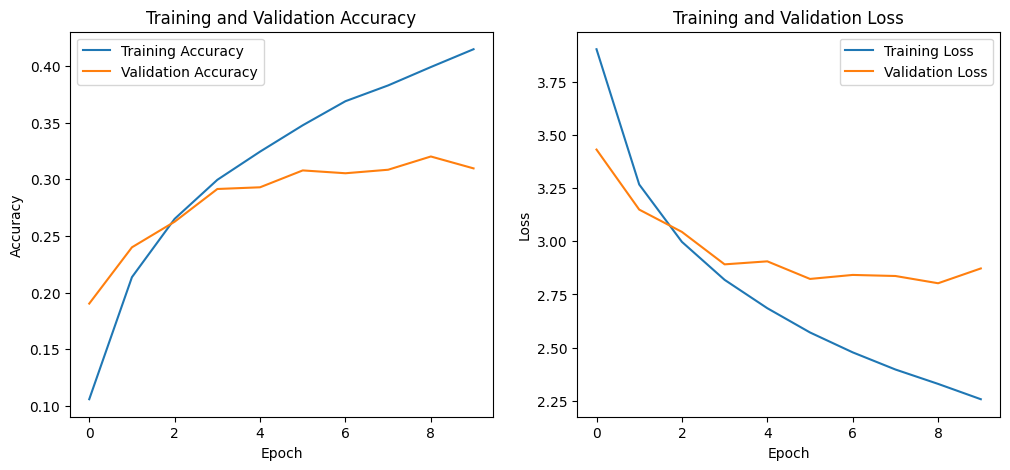

In [28]:
#teest with prediction
loss, acc = base_model.evaluate(test_images, test_labels)
print("Accuracy:", acc)

#accuracy is 0.59


# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

TASK 2 - IMPROVE BASELINE

- data augmentation
- normalization layers
changing filter size, increasing the number of filters, adding more layers, 
using residual blocks, using inception modules, etc.

In [62]:
from tensorflow.keras import Sequential, layers

#data augmentation 
#random flip - flips input images horizontally randomly
#random rotation - randomly rotates images by a fraction of 0.1 radians
#random zoon - randomly zooms input images by a factor of 0.1
# Usig the data augmentation to the base model and compare the result with and without data augmentation
batch_size = 32
img_height = 32
img_width = 32
data_augmentation = Sequential(
  [ 
    layers.RandomFlip("horizontal", 
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
);

In [64]:
# Usig the data augmentation to the base model and compare the result with and without data augmentation
batch_size = 32
img_height = 32
img_width = 32
#do validation split
#The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.
normalization_layer = layers.Rescaling(1./255) #between 0 - 1
#create model
# Get the unique labels
unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)

num_classes = len(unique_labels)
base_model_aug = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (7,7), strides=(1,1),padding='valid', activation='relu'), #(7x7) kernal size
  layers.MaxPooling2D((2,2), strides=(2,2)), #2x2 pool size , stide 2 -> move 2 moves every window
  layers.Conv2D(32, (5,5), strides=(1,1), padding='same', activation='relu'), #same padding -> pad in a way to keep output dim same as input dim
  layers.MaxPooling2D((2,2), strides=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
])

base_model_aug.summary()

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_28 (Sequential)      │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_45 (Rescaling)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
cifar100 = tf.keras.datasets.cifar100 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
#train
base_model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
batch_size = 32
img_height = 32
img_width = 32
epochs = 10

history_dropout_model = base_model_aug.fit(
  train_images, train_labels,
  batch_size=batch_size,
  epochs=epochs,
  validation_data=(test_images, test_labels),
)

# # Evaluate the model
test_loss, test_accuracy = base_model_aug.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)
#performs worse

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.2968 - loss: 2.8070 - val_accuracy: 0.3033 - val_loss: 2.8305
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.3039 - loss: 2.7730 - val_accuracy: 0.2911 - val_loss: 2.9096
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3090 - loss: 2.7499 - val_accuracy: 0.2970 - val_loss: 2.8909
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3133 - loss: 2.7260 - val_accuracy: 0.2812 - val_loss: 2.9609
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3152 - loss: 2.7209 - val_accuracy: 0.3014 - val_loss: 2.8462
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3207 - loss: 2.6934 - val_accuracy: 0.3089 - val_loss: 2.8063
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3180 - loss: 2.6967 - val_accuracy: 0.3074 - val_loss: 2.8054
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3206 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3203 - loss: 2.7728
Accuracy: 0.3206000030040741


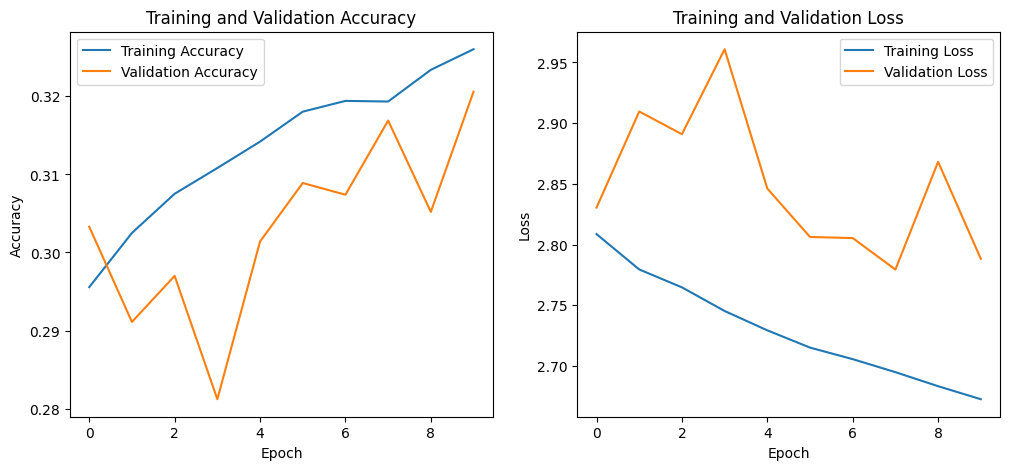

In [71]:
#teest with prediction
loss, acc = base_model_aug.evaluate(test_images, test_labels)
print("Accuracy:", acc)

#accuracy is 0.59


# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dropout_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_dropout_model.history['loss'], label='Training Loss')
plt.plot(history_dropout_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [72]:
#batch normalization
batch_size = 32
img_height = 32
img_width = 32
epochs = 10
bn_model_aa = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (7,7), strides=(1,1),padding='valid', activation=None), #(7x7) kernal size
  layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,),
  layers.ReLU(),  # activation function
  layers.MaxPooling2D((2,2), strides=(2,2)), #2x2 pool size , stide 2 -> move 2 moves every window
  layers.Conv2D(32, (5,5), strides=(1,1), padding='same', activation=None), #same padding -> pad in a way to keep output dim same as input dim
  layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,),
  layers.ReLU(),  # activation function
  layers.MaxPooling2D((2,2), strides=(2,2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
])

bn_model_aa.summary()
# Recomplie and retrain model
bn_model_aa.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 10
history_bn_model_aa = bn_model_aa.fit(
  train_images,train_labels,
  validation_data=(test_images, test_labels),
  epochs=epochs,
  verbose=2, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)

# # Evaluate the model

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_49 (Rescaling)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 26, 26, 16)     │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_26 (ReLU)                 │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 13, 13, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_27 (ReLU)                 │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,876 (687.02 KB)

 Trainable params: 175,780 (686.64 KB)

 Non-trainable params: 96 (384.00 B)

Epoch 1/10
1563/1563 - 23s - 15ms/step - accuracy: 0.1285 - loss: 3.7712 - val_accuracy: 0.1513 - val_loss: 3.6521
Epoch 2/10
1563/1563 - 23s - 15ms/step - accuracy: 0.2350 - loss: 3.1302 - val_accuracy: 0.2340 - val_loss: 3.1291
Epoch 3/10
1563/1563 - 24s - 16ms/step - accuracy: 0.2895 - loss: 2.8487 - val_accuracy: 0.3020 - val_loss: 2.8133
Epoch 4/10
1563/1563 - 24s - 15ms/step - accuracy: 0.3225 - loss: 2.6866 - val_accuracy: 0.3201 - val_loss: 2.7096
Epoch 5/10
1563/1563 - 24s - 15ms/step - accuracy: 0.3449 - loss: 2.5798 - val_accuracy: 0.2926 - val_loss: 2.8942
Epoch 6/10
1563/1563 - 27s - 17ms/step - accuracy: 0.3598 - loss: 2.5052 - val_accuracy: 0.3165 - val_loss: 2.7405
Epoch 7/10
1563/1563 - 27s - 17ms/step - accuracy: 0.3722 - loss: 2.4406 - val_accuracy: 0.2932 - val_loss: 2.8315
Epoch 8/10
1563/1563 - 32s - 20ms/step - accuracy: 0.3853 - loss: 2.3791 - val_accuracy: 0.3389 - val_loss: 2.6069
Epoch 9/10
1563/1563 - 26s - 17ms/step - accuracy: 0.3958 - loss: 2.3395 - val_a

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3492 - loss: 2.5821
Accuracy: 0.3465999960899353


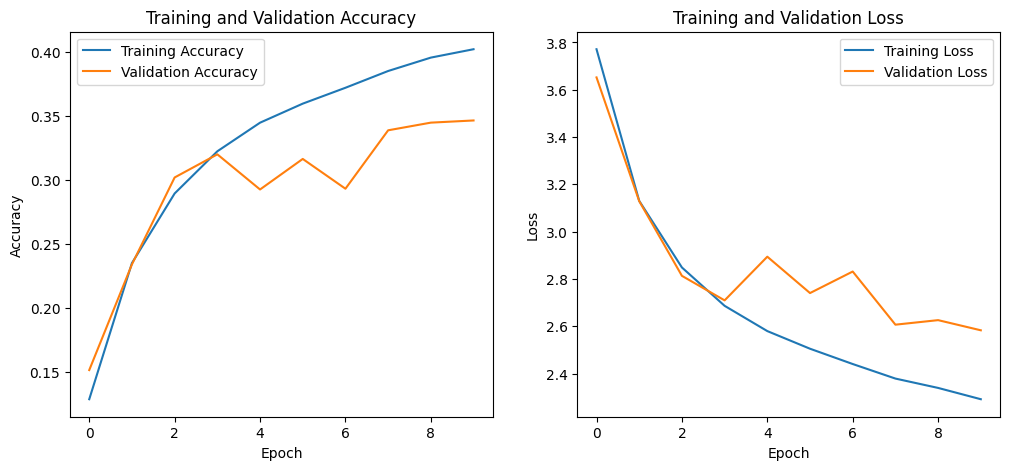

In [73]:
#teest with prediction
loss, acc = bn_model_aa.evaluate(test_images, test_labels)
print("Accuracy:", acc)

#accuracy is 0.59


# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bn_model_aa.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn_model_aa.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bn_model_aa.history['loss'], label='Training Loss')
plt.plot(history_bn_model_aa.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [74]:
batch_size = 32
img_height = 32
img_width = 32
# Get the unique labels
unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)

num_classes = len(unique_labels)
base_model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (17,17), strides=(1,1),padding='valid', activation='relu'), #(7x7) kernal size
  layers.MaxPooling2D((2,2), strides=(2,2)), #2x2 pool size , stide 2 -> move 2 moves every window
  layers.Conv2D(32, (15,15), strides=(1,1), padding='same', activation='relu'), #same padding -> pad in a way to keep output dim same as input dim
  layers.MaxPooling2D((2,2), strides=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
])

base_model.summary()

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


/Users/jon/Documents/FIT5221/tenserflow_env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_50 (Rescaling)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 16, 16, 16)     │        13,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 8, 8, 32)       │       115,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,684 (811.27 KB)

 Trainable params: 207,684 (811.27 KB)

 Non-trainable params: 0 (0.00 B)